# Решение кейса

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Определимся со структорой данных

In [2]:
data = pd.read_csv('contest_train.csv')
data.shape

(24521, 262)

In [3]:
pd.options.display.max_columns =300
pd.options.display.max_rows =300

Выведем первые пять

In [4]:
data.head()

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_71,FEATURE_72,FEATURE_73,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_123,FEATURE_124,FEATURE_125,FEATURE_126,FEATURE_127,FEATURE_128,FEATURE_129,FEATURE_130,FEATURE_131,FEATURE_132,FEATURE_133,FEATURE_134,FEATURE_135,FEATURE_136,FEATURE_137,FEATURE_138,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_149,FEATURE_150,FEATURE_151,FEATURE_152,FEATURE_153,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_162,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_173,FEATURE_174,FEATURE_175,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_181,FEATURE_182,FEATURE_183,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_187,FEATURE_188,FEATURE_189,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193,FEATURE_194,FEATURE_195,FEATURE_196,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_203,FEATURE_204,FEATURE_205,FEATURE_206,FEATURE_207,FEATURE_208,FEATURE_209,FEATURE_210,FEATURE_211,FEATURE_212,FEATURE_213,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1053371037,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,-17.218055,0.0,0.0,0.0,25.257841,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.492541,0.0,3.770712,-2.165145,0.0,-11.508692,0.0,0.0,0.0,0.0,0.0,0.0,0.709990,-166.128241,16.497987,-109.953267,-10.257451,-35.403966,0.0,0.0,0.0,0.0,0.0,0.0,10.689090,0.868280,79.319996,57.563879,5.147706,219.773565,13.723706,79.067758,12.855037,-22.713935,-13.550348,-31.575653,64.609721,111.118840,104.421868,93.389622,33.815437,27.072520,60.966939,279.433996,242.857149,342.448089,180.439710,157.383234,12.0,0.0,436.976097,393.719775,438.089670,5.0,0.0,1.225806,20.945718,100.423397,-14.418549,11.459275,49.192649,58.212399,103.175453,30.562678,0.022050,12.683430,1.009054,-1.828095,0.040347,-11.521372,30.630117,-3.772832,-13.410730,17.525901,-0.033100,0.151530,8.523431,41.071996,0.367572,-0.267070,0.288801,-0.523745,48.307264,0.648305,0.123284,0.430367,6.378862,41.714275,1.401470,0.000000,0.125000,2.407001,8.846116,0.375000,5.0,3.0,0.0,0.0,0.0,0.0

In [5]:
data_X = data.drop(['ID','TARGET'], axis=1)
data_y=data['TARGET']

Видно, что столбцы 3, 144 и 256 полностью состоят из нулей, их можно вырезать

In [6]:
data_X = data_X.drop(['FEATURE_3','FEATURE_144','FEATURE_256'], axis=1)

Проверим, есть ли категориальные признаки

In [7]:
categorical_columns = [c for c in data_X.columns if data_X[c].dtype.name == 'object']
numerical_columns   = [c for c in data_X.columns if data_X[c].dtype.name != 'object']
print categorical_columns
print numerical_columns 

[]
['FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8', 'FEATURE_9', 'FEATURE_10', 'FEATURE_11', 'FEATURE_12', 'FEATURE_13', 'FEATURE_14', 'FEATURE_15', 'FEATURE_16', 'FEATURE_17', 'FEATURE_18', 'FEATURE_19', 'FEATURE_20', 'FEATURE_21', 'FEATURE_22', 'FEATURE_23', 'FEATURE_24', 'FEATURE_25', 'FEATURE_26', 'FEATURE_27', 'FEATURE_28', 'FEATURE_29', 'FEATURE_30', 'FEATURE_31', 'FEATURE_32', 'FEATURE_33', 'FEATURE_34', 'FEATURE_35', 'FEATURE_36', 'FEATURE_37', 'FEATURE_38', 'FEATURE_39', 'FEATURE_40', 'FEATURE_41', 'FEATURE_42', 'FEATURE_43', 'FEATURE_44', 'FEATURE_45', 'FEATURE_46', 'FEATURE_47', 'FEATURE_48', 'FEATURE_49', 'FEATURE_50', 'FEATURE_51', 'FEATURE_52', 'FEATURE_53', 'FEATURE_54', 'FEATURE_55', 'FEATURE_56', 'FEATURE_57', 'FEATURE_58', 'FEATURE_59', 'FEATURE_60', 'FEATURE_61', 'FEATURE_62', 'FEATURE_63', 'FEATURE_64', 'FEATURE_65', 'FEATURE_66', 'FEATURE_67', 'FEATURE_68', 'FEATURE_69', 'FEATURE_70', 'FEATURE_71', 'FEATURE_72

получаем, что категориальных значений нет, следовательно и кодировать ничего не нужно

Выкинем пустые значения

In [8]:
data.dropna().shape

(211, 262)

Получается, что выкидываем все данные. Значит этот вариант взаимодействия с данными нам не подходит

Проверим на корреляцию

In [9]:
CorrKoef = data_X.corr()

Проверим, остались ли нулевые признаки

In [10]:
FieldDrop = [i for i in CorrKoef if CorrKoef[i].isnull().drop_duplicates().values[0]]
print FieldDrop

['FEATURE_249']


In [11]:
data_X=data_X.drop(['FEATURE_249'], axis=1)

In [12]:
CorField = []
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.96]:
        if i <> j and j not in CorField and i not in CorField:
            CorField.append(j)
            print "%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0])

FEATURE_55-->FEATURE_233: r^2=0.962607
FEATURE_67-->FEATURE_237: r^2=0.962796
FEATURE_71-->FEATURE_73: r^2=0.981342
FEATURE_72-->FEATURE_195: r^2=0.989789
FEATURE_81-->FEATURE_113: r^2=0.969078
FEATURE_117-->FEATURE_119: r^2=0.976430
FEATURE_118-->FEATURE_120: r^2=0.986923
FEATURE_150-->FEATURE_153: r^2=0.997165
FEATURE_155-->FEATURE_158: r^2=0.987895
FEATURE_164-->FEATURE_225: r^2=0.986214
FEATURE_168-->FEATURE_173: r^2=0.966113
FEATURE_182-->FEATURE_186: r^2=0.998803
FEATURE_184-->FEATURE_200: r^2=1.000000
FEATURE_227-->FEATURE_228: r^2=0.966729
FEATURE_241-->FEATURE_245: r^2=0.999998


Удалим полученные данне, но прежде построим корреляционный Scatter Plot(визуализация)

In [13]:
data_corr=data_X[['FEATURE_55','FEATURE_67','FEATURE_71','FEATURE_72','FEATURE_81','FEATURE_117','FEATURE_118',
                 'FEATURE_150','FEATURE_155','FEATURE_164','FEATURE_168','FEATURE_182','FEATURE_184','FEATURE_227',
                  'FEATURE_241','FEATURE_233','FEATURE_237','FEATURE_73','FEATURE_195','FEATURE_113','FEATURE_119',
                 'FEATURE_120','FEATURE_153','FEATURE_158','FEATURE_225','FEATURE_173','FEATURE_186','FEATURE_200',
                 'FEATURE_228','FEATURE_245']]

In [14]:
writer = pd.ExcelWriter('correlation.xlsx', engine='xlsxwriter')
# Write your DataFrame to a file     
data_corr.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()

In [14]:
data_X=data_X.drop(['FEATURE_55','FEATURE_67','FEATURE_71','FEATURE_72','FEATURE_81','FEATURE_117','FEATURE_118',
                 'FEATURE_150','FEATURE_155','FEATURE_164','FEATURE_168','FEATURE_182','FEATURE_184','FEATURE_227',
                  'FEATURE_241'], axis=1)

Пропущенные значения можно так же интерпретировать, для этого существует несколько способов, они различаются для категориальных и вещественных признаков.

Для вещественных признаков:
- заменить на 0 (данный признак давать вклад в предсказание для данного объекта не будет)
- заменить на среднее (каждый пропущенный признак будет давать такой же вклад, как и среднее значение признака на датасете)


In [15]:
data_X_med = data_X.fillna(data_X.median(axis=0), axis=0)
data_X_zeros=data_X.fillna(0)
data_X_med.shape

(24521, 241)

# Работа с тестовой выборкой

In [16]:
data_test = pd.read_csv('contest_test.csv')
data_test.shape

(9484, 261)

In [17]:
data_test.head()

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_71,FEATURE_72,FEATURE_73,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_123,FEATURE_124,FEATURE_125,FEATURE_126,FEATURE_127,FEATURE_128,FEATURE_129,FEATURE_130,FEATURE_131,FEATURE_132,FEATURE_133,FEATURE_134,FEATURE_135,FEATURE_136,FEATURE_137,FEATURE_138,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_149,FEATURE_150,FEATURE_151,FEATURE_152,FEATURE_153,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_162,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_173,FEATURE_174,FEATURE_175,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_181,FEATURE_182,FEATURE_183,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_187,FEATURE_188,FEATURE_189,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193,FEATURE_194,FEATURE_195,FEATURE_196,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_203,FEATURE_204,FEATURE_205,FEATURE_206,FEATURE_207,FEATURE_208,FEATURE_209,FEATURE_210,FEATURE_211,FEATURE_212,FEATURE_213,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1154270440,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-46.950807,-45.018511,0.0,0.0,0.0,375.275910,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.426897,0.0,2.321265,-0.905753,0.0,-22.227774,0.0,0.0,0.0,0.0,0.0,0.0,-42.820859,1.147440,85.294977,-23.305163,-38.461023,9.575998,0.0,0.0,0.0,0.0,0.0,0.0,-4.510067,-20.719010,7.774870,15.178316,1.515104,-43.290683,-29.728391,34.517901,-18.187199,56.651924,-37.703662,130.202599,582.921182,624.674635,557.702305,434.520798,588.011906,282.194361,705.288507,738.578876,738.499869,531.774417,813.122093,520.256601,30.0,0.0,NaN,NaN,NaN,1.0,0.0,0.032258,-0.609202,-30.074491,47.941271,70.252091,157.191010,70.579346,168.936848,407.498386,-0.085507,-0.379985,0.934419,-2.443756,-0.125146,1.764887,22.584077,25.200351,-29.870614,-7.382193,-0.038531,8.096900,17.631453,23.893117,1.151167,-0.121871,29.171740,70.636524,93.765576,4.160983,1.273033,6.825932,13.736248,26.244614,2.803187,1.500000,10.666667,19.477371,39.197937,4.000000,7.0,14.0,0.0,0.0,0.0,0.0,12.0,28.0,1.0,25.0

In [18]:
data_test_X = data_test.drop(['ID','FEATURE_3','FEATURE_144','FEATURE_249','FEATURE_256'], axis=1)

In [19]:
data_test_X=data_test_X.drop(['FEATURE_55','FEATURE_67','FEATURE_71','FEATURE_72','FEATURE_81','FEATURE_117','FEATURE_118',
                 'FEATURE_150','FEATURE_155','FEATURE_164','FEATURE_168','FEATURE_182','FEATURE_184','FEATURE_227',
                  'FEATURE_241'], axis=1)

In [20]:
data_test_X_zeros=data_test_X.fillna(0)
data_test_X_zeros.shape

(9484, 241)

# Построение моделей

Найдем сначала, какой способ заполнения лучше

In [21]:
data_X_zeros=data_X_zeros.head(5000)
data_X_med=data_X_med.head(5000)
data_y=data_y.head(5000)
data_y.shape

(5000L,)

In [22]:
data_X_zeros.shape

(5000, 241)

Разделим начальную выборку в пропорции 70% на обучение и 30% на тест, чтобы иметь возможность сравнить различные алгоритмы

In [23]:
from sklearn.cross_validation import train_test_split
#для нулей
data_tr_zeros, data_ts_zeros, tar_tr_zeros, tar_ts_zeros = train_test_split(data_X_zeros, data_y, test_size=0.3, random_state=0)
#для среднего
data_tr_mean, data_ts_mean, tar_tr_mean, tar_ts_mean = train_test_split(data_X_med, data_y, test_size=0.3, random_state=0)

C:\Users\Simba\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report
#обучение
estimator1 = LogisticRegression()
estimator2 = LogisticRegression()
#запуск процесса перебора по сетке
estimator1.fit(data_tr_zeros, tar_tr_zeros)
estimator2.fit(data_tr_mean, tar_tr_mean)

#оценка по метрикам качества
report1 = classification_report(tar_ts_zeros, estimator1.predict(data_ts_zeros),target_names=['Class 1', 'Class 2', 'Class 3'])
print(report1)
report2 = classification_report(tar_ts_mean, estimator1.predict(data_ts_mean),target_names=['Class 1', 'Class 2', 'Class 3'])
print(report2)

             precision    recall  f1-score   support

    Class 1       0.72      0.94      0.81      1040
    Class 2       0.35      0.07      0.12       380
    Class 3       0.42      0.33      0.37        80

avg / total       0.61      0.69      0.61      1500

             precision    recall  f1-score   support

    Class 1       0.73      0.84      0.78      1040
    Class 2       0.34      0.18      0.23       380
    Class 3       0.34      0.42      0.38        80

avg / total       0.61      0.65      0.62      1500



Confusion matrix, without normalization
[[976  42  22]
 [339  27  14]
 [ 46   8  26]]


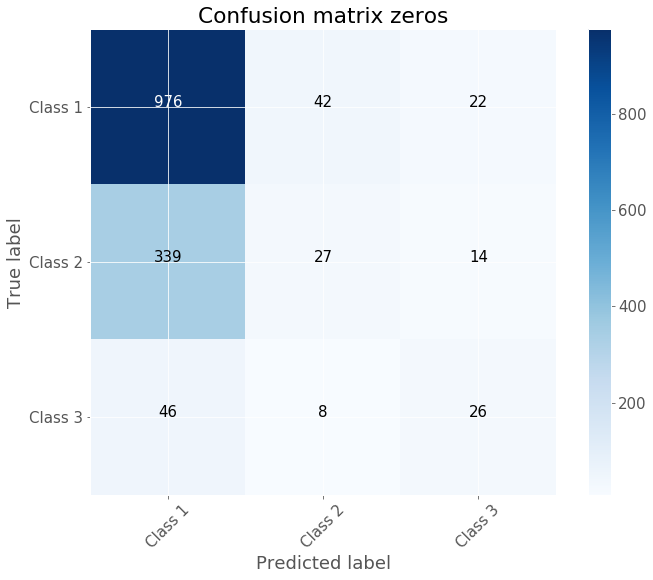

In [25]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(tar_ts_zeros, estimator1.predict(data_ts_zeros))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Class 1', 'Class 2','Class 3'],
                      title='Confusion matrix zeros')
plt.savefig("conf_matrix_zeros.png")
plt.show()

Confusion matrix, without normalization
[[977  40  23]
 [336  29  15]
 [ 44   8  28]]


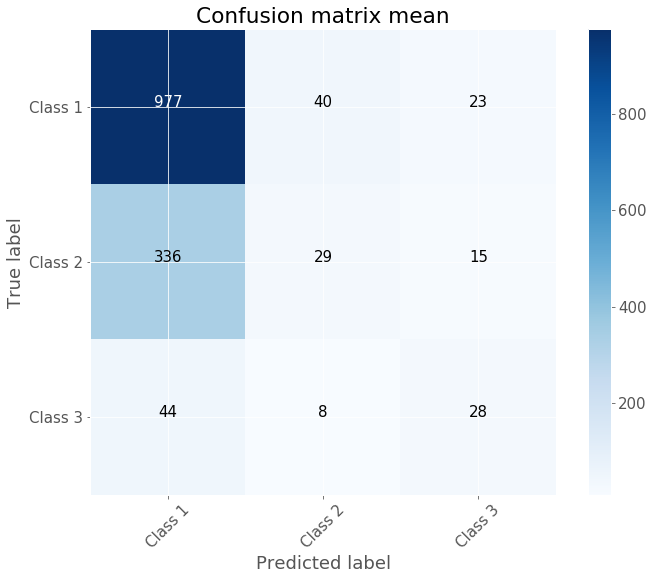

In [26]:
cnf_matrix = confusion_matrix(tar_ts_mean, estimator2.predict(data_ts_mean))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Class 1', 'Class 2','Class 3'],
                      title='Confusion matrix mean')
plt.savefig("conf_matrix_mean.png")
plt.show()

выбираем для дальнейшей работы заполнение нулями

# Отбор алгоритмов

In [27]:
#метод k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
estk = KNeighborsClassifier()
estk.fit(data_tr_mean, tar_tr_mean)
# make predictions
reportk1 = classification_report(tar_ts_zeros, estk.predict(data_ts_zeros),target_names=['Class 1', 'Class 2', 'Class 3'])
print(reportk1)

             precision    recall  f1-score   support

    Class 1       0.71      0.92      0.80      1040
    Class 2       0.36      0.12      0.18       380
    Class 3       0.17      0.04      0.06        80

avg / total       0.59      0.67      0.60      1500



In [28]:

from sklearn.ensemble import RandomForestClassifier
# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier()
clf.fit(data_tr_zeros, tar_tr_zeros)
clf_probs = clf.predict(data_ts_zeros)
print (clf_probs)
reportf1 = classification_report(tar_ts_zeros, clf_probs,target_names=['Class 1', 'Class 2', 'Class 3'])
print (reportf1)

[0 0 0 ..., 0 0 0]
             precision    recall  f1-score   support

    Class 1       0.71      0.94      0.81      1040
    Class 2       0.35      0.08      0.12       380
    Class 3       0.50      0.26      0.34        80

avg / total       0.61      0.69      0.61      1500



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
estgrad = GradientBoostingClassifier()
estgrad.fit(data_tr_zeros, tar_tr_zeros)
estgrad_probs = estgrad.predict(data_ts_zeros)
probs = estgrad.predict_proba(data_ts_zeros)
reportg1 = classification_report(tar_ts_zeros, estgrad_probs,target_names=['Class 1', 'Class 2', 'Class 3'])
print (reportg1)

             precision    recall  f1-score   support

    Class 1       0.72      0.97      0.83      1040
    Class 2       0.54      0.06      0.10       380
    Class 3       0.52      0.36      0.43        80

avg / total       0.66      0.71      0.62      1500



# Настройка параметров модели

In [30]:
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1_macro', n_jobs=4,iid=False, cv=5)
gsearch1.fit(data_tr_zeros, tar_tr_zeros)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Simba\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.36365, std: 0.00994, params: {'n_estimators': 20},
  mean: 0.39915, std: 0.00520, params: {'n_estimators': 30},
  mean: 0.41780, std: 0.00656, params: {'n_estimators': 40},
  mean: 0.43666, std: 0.00655, params: {'n_estimators': 50},
  mean: 0.44298, std: 0.00428, params: {'n_estimators': 60},
  mean: 0.45123, std: 0.00608, params: {'n_estimators': 70},
  mean: 0.45629, std: 0.00554, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.4562907648857351)

In [ ]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1_macro',n_jobs=4,iid=False, cv=5)
gsearch2.fit(data_tr_zeros, tar_tr_zeros)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1_macro',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data_tr_zeros, tar_tr_zeros)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [31]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1_macro',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data_tr_zeros, tar_tr_zeros)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.42168, std: 0.01334, params: {'max_features': 7},
  mean: 0.42770, std: 0.00899, params: {'max_features': 9},
  mean: 0.42917, std: 0.00796, params: {'max_features': 11},
  mean: 0.43212, std: 0.01382, params: {'max_features': 13},
  mean: 0.43291, std: 0.01116, params: {'max_features': 15},
  mean: 0.43508, std: 0.01201, params: {'max_features': 17},
  mean: 0.43640, std: 0.00938, params: {'max_features': 19}],
 {'max_features': 19},
 0.436403937833581)

In [32]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='f1_macro',n_jobs=4,iid=False, cv=5)
gsearch5.fit(data_tr_zeros, tar_tr_zeros)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.40852, std: 0.00882, params: {'subsample': 0.6},
  mean: 0.42016, std: 0.01039, params: {'subsample': 0.7},
  mean: 0.41997, std: 0.00977, params: {'subsample': 0.75},
  mean: 0.42168, std: 0.01334, params: {'subsample': 0.8},
  mean: 0.42015, std: 0.01104, params: {'subsample': 0.85},
  mean: 0.42026, std: 0.00804, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.42167906261129817)

Обучим модель с выбранными параметрами

In [30]:
params = {'n_estimators': 80,'max_depth': 15, 'min_samples_split': 200,'min_samples_leaf': 50, 'min_samples_split': 1200, 'max_features': 19,'subsample': 0.8}

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
estgrad = GradientBoostingClassifier(**params)
estgrad.fit(data_tr_zeros, tar_tr_zeros)
estgrad_probs = estgrad.predict(data_ts_zeros)
probs = estgrad.predict_proba(data_ts_zeros)
print (probs)
reportg1 = classification_report(tar_ts_zeros, estgrad_probs,target_names=['Class 1', 'Class 2', 'Class 3'])
print (reportg1)

[[ 0.86585214  0.10738687  0.02676099]
 [ 0.65701139  0.32971783  0.01327078]
 [ 0.69882529  0.24382398  0.05735072]
 ..., 
 [ 0.88306435  0.11013895  0.00679671]
 [ 0.79804457  0.18900731  0.01294811]
 [ 0.78368309  0.18761861  0.0286983 ]]
             precision    recall  f1-score   support

    Class 1       0.72      0.98      0.83      1040
    Class 2       0.53      0.05      0.10       380
    Class 3       0.47      0.33      0.39        80

avg / total       0.66      0.71      0.62      1500



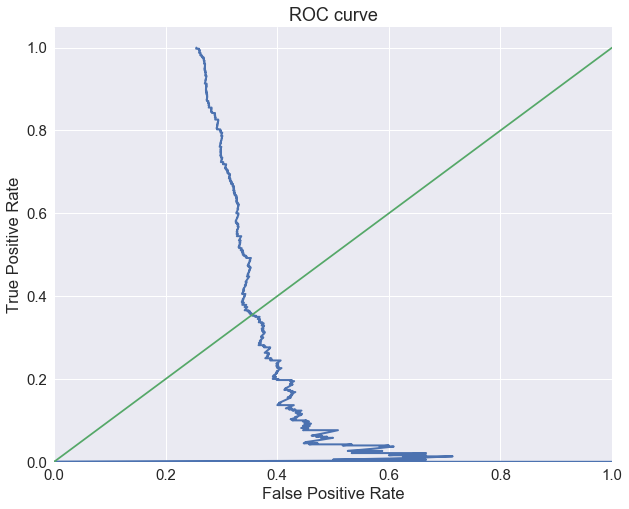

In [32]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = precision_recall_curve(tar_ts_zeros, estgrad.predict_proba(data_ts_zeros)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

# Финальная работа с моделью

In [33]:
estgrad = GradientBoostingClassifier(**params)
estgrad.fit(data_X_zeros, data_y)
estgrad_probs = estgrad.predict(data_test_X_zeros)
probs = estgrad.predict_proba(data_test_X_zeros)

Объединение

In [46]:
df = pd.DataFrame(estgrad_probs,columns=['TARGET'])

In [38]:
answer1=data_test_X[['ID']]
answer1=pd.concat([answer1,df],axis=1)

In [47]:
answer1.to_csv('contest_answer.csv',index=False)

Сортировка

In [52]:
df2 = pd.DataFrame(probs,columns=['p0','p1','p2'])
vb=pd.concat([answer1,df2],axis=1)

Группировка по категориям

In [60]:
Gr1=vb.loc[vb['TARGET'] == 0]
Gr2=vb.loc[vb['TARGET'] == 1]
Gr3=vb.loc[vb['TARGET'] == 2]

Сортировка

In [61]:
Gr2_mod=Gr2.sort_values(by=['p1'], ascending=False)
Gr3_mod=Gr3.sort_values(by=['p2'], ascending=False)

Объединение и запись

In [65]:
answer2_seg2=Gr2_mod.head(500)
answer2_seg2=answer2_seg2[['ID','TARGET']]
answer2_seg3=Gr3_mod.head(200)
answer2_seg3=answer2_seg3[['ID','TARGET']]
answer2=pd.concat([answer2_seg2,answer2_seg3],axis=0)
answer2.to_csv('contest_segments.csv',index=False)

In [67]:
check = pd.read_csv('contest_segments.csv')
check.head()

,ID,TARGET
0,7402737492,1
1,5390178618,1
2,1394389603,1
3,620331395,1
4,746852513,1


In [27]:
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          LogisticRegression() # логистическая регрессия 
         ]

NameError: name 'LinearRegression' is not defined